In [7]:
#Set the necessary libraries
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
plt.style.use('ggplot')

%matplotlib inline
from pandas.util.testing import assert_frame_equal

#csv contains data for february only. We're analysing reasons for low crime in februaries
df_bronx = pd.read_csv('year_feb_days_borough/bronx.csv',names=['Year','Day','Offense_Code','Borough','Frequency'])
df_bronx = df_bronx.loc[df_bronx['Offense_Code'].isin([344,341,578])] 
#print df_bronx
df_brooklyn = pd.read_csv('year_feb_days_borough/brooklyn.csv',names=['Year','Day','Offense_Code','Borough','Frequency'])
df_brooklyn = df_brooklyn.loc[df_brooklyn['Offense_Code'].isin([344,341,578])] 

df_manhattan = pd.read_csv('year_feb_days_borough/bronx.csv',names=['Year','Day','Offense_Code','Borough','Frequency'])
df_manhattan = df_manhattan.loc[df_manhattan['Offense_Code'].isin([344,109,578])] 

df_staten = pd.read_csv('year_feb_days_borough/staten.csv',names=['Year','Day','Offense_Code','Borough','Frequency'])
df_staten = df_staten.loc[df_staten['Offense_Code'].isin([351,341,578])] 

df_queens = pd.read_csv('year_feb_days_borough/queens.csv',names=['Year','Day','Offense_Code','Borough','Frequency'])
#df.columns = ['Year','Day','Offense_Code','Borough','Frequency']
df_queens = df_queens.loc[df_queens['Offense_Code'].isin([344,341,578])] 


In [9]:
#List of Super bowl dates in February
super_bowl_raw_dates = {'Year':['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'],'Day': ['5','4','3','1','7','6','5','3','2','1']}

In [10]:
super_bowl_df = pd.DataFrame(super_bowl_raw_dates,columns =['Year','Day'] )
super_bowl_df.dtypes


Year    object
Day     object
dtype: object

In [11]:
super_bowl_df['Year'] = super_bowl_df['Year'].astype(int)
super_bowl_df['Day'] = super_bowl_df['Day'].astype(int)

super_bowl_df.dtypes

Year    int64
Day     int64
dtype: object

In [12]:
super_bowl_df

,Year,Day
0,2006,5
1,2007,4
2,2008,3
3,2009,1
4,2010,7
5,2011,6
6,2012,5
7,2013,3
8,2014,2
9,2015,1


In [20]:
#Get the number of crimes that took place on super bowl day in Bronx
s1 = pd.merge(df_bronx, super_bowl_df, how='inner', on=['Year','Day'])
print s1
#Grouping by day to get the number of crimes that took place on super bowl days
#s1['Frequency'].groupby([s1['Day'],s1['Year']]).count()
s1.groupby(['Day','Year'])['Frequency'].sum()

    Year  Day  Offense_Code Borough  Frequency
0   2006    5           341   BRONX         24
1   2006    5           344   BRONX         39
2   2006    5           578   BRONX         25
3   2007    4           341   BRONX         25
4   2007    4           344   BRONX         37
5   2007    4           578   BRONX         31
6   2008    3           341   BRONX         27
7   2008    3           344   BRONX         46
8   2008    3           578   BRONX         33
9   2009    1           341   BRONX         28
10  2009    1           344   BRONX         32
11  2009    1           578   BRONX         37
12  2010    7           341   BRONX         21
13  2010    7           344   BRONX         27
14  2010    7           578   BRONX         31
15  2011    6           341   BRONX         21
16  2011    6           344   BRONX         48
17  2011    6           578   BRONX         20
18  2012    5           341   BRONX         34
19  2012    5           344   BRONX         35
20  2012    5

Day  Year
1    2009     97
     2015     92
2    2014     90
3    2008    106
     2013     85
4    2007     93
5    2006     88
     2012     89
6    2011     89
7    2010     79
Name: Frequency, dtype: int64

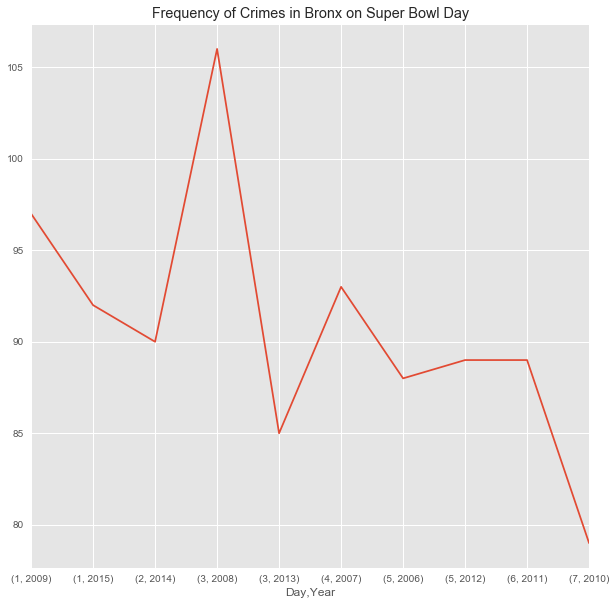

In [22]:
s1.groupby(['Day','Year'])['Frequency'].sum().plot( figsize=(10,10), title='Frequency of Crimes in Bronx on Super Bowl Day')



In [15]:
#get the lowest crime days for bronx
df_bronx.head()

,Year,Day,Offense_Code,Borough,Frequency
20,2006,1,341,BRONX,50
21,2006,1,344,BRONX,31
31,2006,1,578,BRONX,46
50,2006,2,341,BRONX,48
52,2006,2,344,BRONX,34


In [23]:
#get the total crime count in Bronx for each day of feb, for each feb from 2006-2015 and get the lowest counts 
print "Super Bowl days and Crime Frequency in Bronx"
print s1.groupby(['Day','Year'])['Frequency'].sum()
print "===================================================================\n"
print "Crime Count in Bronx in February"
print df_bronx.groupby(['Day','Year'])['Frequency'].sum().nsmallest(20)

#Crime wasn't necessarily the lowest in Bronx on Super Bowl Day

Super Bowl days and Crime Frequency in Bronx
Day  Year
1    2009     97
     2015     92
2    2014     90
3    2008    106
     2013     85
4    2007     93
5    2006     88
     2012     89
6    2011     89
7    2010     79
Name: Frequency, dtype: int64

Crime Count in Bronx in February
Day  Year
11   2010    63
18   2009    66
21   2011    66
16   2010    67
10   2010    70
12   2006    70
26   2010    70
28   2010    70
7    2007    73
19   2007    73
8    2009    74
19   2011    74
24   2010    74
8    2011    75
20   2011    75
10   2007    76
14   2007    76
16   2009    76
17   2013    76
18   2007    76
Name: Frequency, dtype: int64


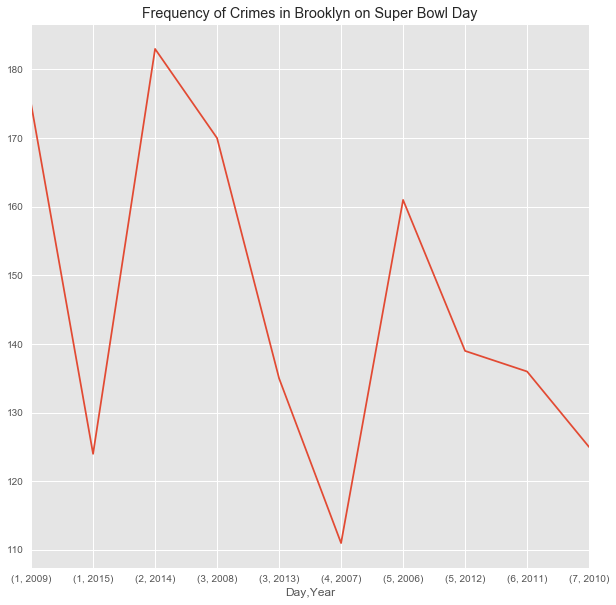

In [24]:
#Repeating for brooklyn
s2 = pd.merge(df_brooklyn, super_bowl_df, how='inner', on=['Year','Day'])
s2.groupby(['Day','Year'])['Frequency'].sum().plot( figsize=(10,10), title='Frequency of Crimes in Brooklyn on Super Bowl Day')


In [26]:
#get the total crime count in Brooklyn for each day of feb, for each feb from 2006-2015 and get the lowest counts 
print "Super Bowl days and Crime Frequency in Brooklyn"
print s2.groupby(['Day','Year'])['Frequency'].sum()
print "===================================================================\n"
print "Crime Count in Brooklyn in February"
print df_brooklyn.groupby(['Day','Year'])['Frequency'].sum().nsmallest(20)
#Note: No Link found between superbowl and low crime in brooklyn

Super Bowl days and Crime Frequency in Brooklyn
Day  Year
1    2009    175
     2015    124
2    2014    183
3    2008    170
     2013    135
4    2007    111
5    2006    161
     2012    139
6    2011    136
7    2010    125
Name: Frequency, dtype: int64

Crime Count in Brooklyn in February
Day  Year
12   2006     91
3    2015     93
16   2010     93
9    2013     98
2    2015    101
17   2015    102
27   2011    104
5    2011    105
10   2010    106
17   2008    106
15   2010    107
26   2010    107
13   2014    108
15   2007    108
2    2011    110
8    2013    110
14   2010    110
17   2009    110
21   2011    110
22   2009    110
Name: Frequency, dtype: int64


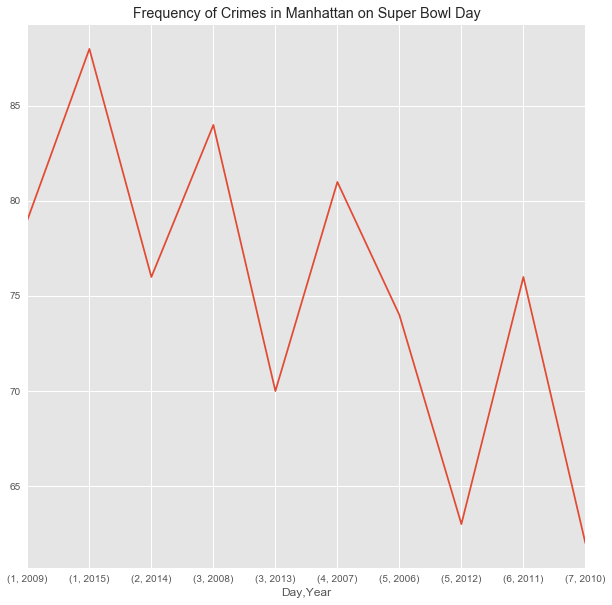

In [27]:
#Repeating for Manhattan
s3 = pd.merge(df_manhattan, super_bowl_df, how='inner', on=['Year','Day'])
s3.groupby(['Day','Year'])['Frequency'].sum().plot( figsize=(10,10), title='Frequency of Crimes in Manhattan on Super Bowl Day')


In [28]:
#get the total crime count in Manhattan for each day of feb, for each feb from 2006-2015 and get the lowest counts 
print "Super Bowl days and Crime Frequency in Manhattan"
print s3.groupby(['Day','Year'])['Frequency'].sum()
print "===================================================================\n"
print "Crime Count in Manhattan in February"
print df_manhattan.groupby(['Day','Year'])['Frequency'].sum().nsmallest(20)
#Note: No Link found between superbowl and low crime in Manhattan

Super Bowl days and Crime Frequency in Manhattan
Day  Year
1    2009    79
     2015    88
2    2014    76
3    2008    84
     2013    70
4    2007    81
5    2006    74
     2012    63
6    2011    76
7    2010    62
Name: Frequency, dtype: int64

Crime Count in Manhattan in February
Day  Year
18   2009    43
11   2010    44
16   2010    47
19   2011    50
16   2009    52
6    2014    53
19   2007    55
17   2009    56
24   2008    56
13   2014    57
19   2015    57
7    2009    58
20   2011    58
21   2011    58
26   2010    58
11   2008    59
17   2015    59
8    2011    60
9    2013    60
19   2009    60
Name: Frequency, dtype: int64


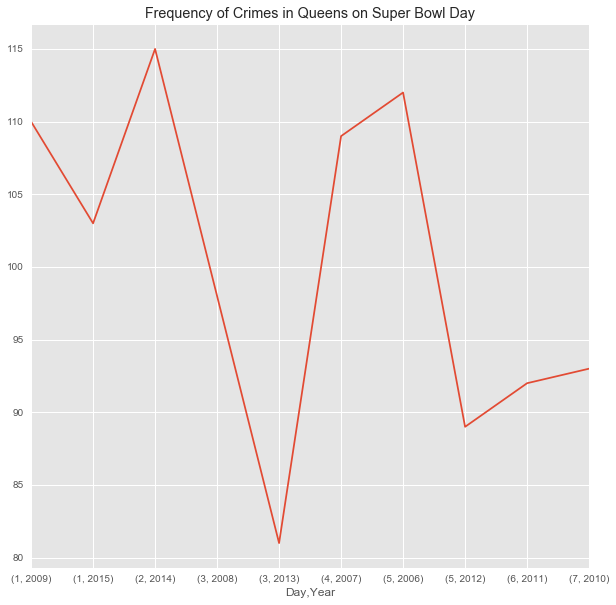

In [29]:
#Repeating for Queens 
s4 = pd.merge(df_queens, super_bowl_df, how='inner', on=['Year','Day'])
s4.groupby(['Day','Year'])['Frequency'].sum().plot( figsize=(10,10), title='Frequency of Crimes in Queens on Super Bowl Day')


In [30]:
#get the total crime count in Queens for each day of feb, for each feb from 2006-2015 and get the lowest counts 
print "Super Bowl days and Crime Frequency in Queens"
print s4.groupby(['Day','Year'])['Frequency'].sum()
print "===================================================================\n"
print "Crime Count in Queens in February"
print s4.groupby(['Day','Year'])['Frequency'].sum().nsmallest(20)
#Note: No Link found between superbowl and low crime days in Queens

Super Bowl days and Crime Frequency in Queens
Day  Year
1    2009    110
     2015    103
2    2014    115
3    2008     98
     2013     81
4    2007    109
5    2006    112
     2012     89
6    2011     92
7    2010     93
Name: Frequency, dtype: int64

Crime Count in Queens in February
Day  Year
3    2013     81
5    2012     89
6    2011     92
7    2010     93
3    2008     98
1    2015    103
4    2007    109
1    2009    110
5    2006    112
2    2014    115
Name: Frequency, dtype: int64


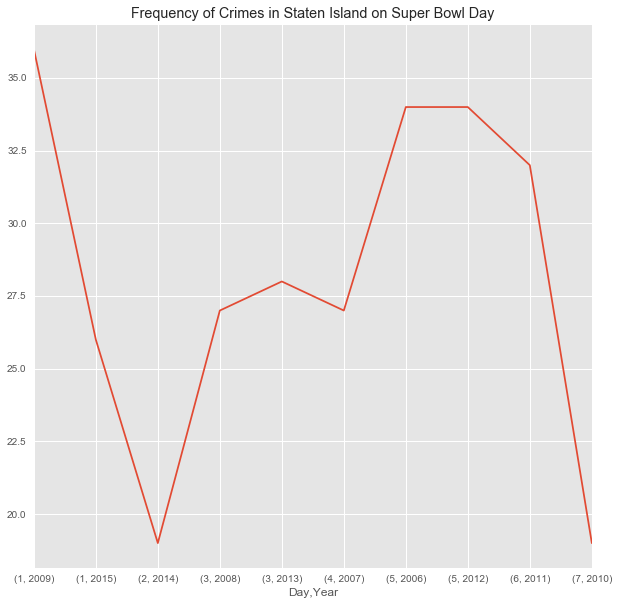

In [31]:
#Repeating for Staten Island
s5 = pd.merge(df_staten, super_bowl_df, how='inner', on=['Year','Day'])
s5.groupby(['Day','Year'])['Frequency'].sum().plot( figsize=(10,10), title='Frequency of Crimes in Staten Island on Super Bowl Day')


In [32]:
#get the total crime count in Staten Island for each day of feb, for each feb from 2006-2015 and get the lowest counts 
print "Super Bowl days and Crime Frequency in Staten Island"
print s5.groupby(['Day','Year'])['Frequency'].sum()
print "===================================================================\n"
print "Crime Count in Staten Island in February"
print s5.groupby(['Day','Year'])['Frequency'].sum().nsmallest(20)
#Note: No Link found between superbowl and low crime days in Staten Island 

Super Bowl days and Crime Frequency in Staten Island
Day  Year
1    2009    36
     2015    26
2    2014    19
3    2008    27
     2013    28
4    2007    27
5    2006    34
     2012    34
6    2011    32
7    2010    19
Name: Frequency, dtype: int64

Crime Count in Staten Island in February
Day  Year
2    2014    19
7    2010    19
1    2015    26
3    2008    27
4    2007    27
3    2013    28
6    2011    32
5    2006    34
     2012    34
1    2009    36
Name: Frequency, dtype: int64
